## Upload the folder DFC-VAE
Ensure that there is a directory "data" containing a subfolder "celeba", after unzipping the images into "celeba", just make a folder "Ann" and upload the "list_attr_celeba.csv" file provided.The files should be organized as below:

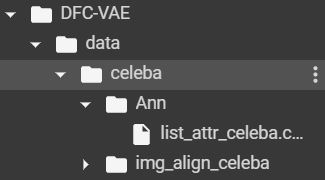

In [2]:
!pip3 install --upgrade pip

In [ ]:
cd /content/DFC-VAE

In [ ]:
!pip3 install -r requirements.txt

In [1]:
cd /content/DFC-VAE

/content/Deep-Feature-Consistent-VAE


In [29]:
!unzip -uq '/content/drive/MyDrive/CelebA/Img/img_align_celeba.zip' -d '/content/DFC-VAE/data/celeba'

In [2]:
import models.vae as model
decoder = model.Decoder()

In [13]:
import models.vggnet as model
vae123 = model.VGG123()
vae345 = model.VGG345()
print('\n',vae123,'\n\n',vae345)


 VGG123(
  (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (max2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
) 

 VGG345(
  (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_

## Train Vae
Execute the appropriate command based on the choice of the model i.e. Plain VAE , VAE123 or VAE345.

python3 train_vae.py --rootdir <path> --loss 0 -o pvae

python3 train_vae.py --rootdir <path> --loss 1 -o vae123

python3 train_vae.py --rootdir <path> --loss 2 -o vae345

In [ ]:
!python3 train_vae.py --rootdir /content/DFC-VAE/data/celeba/ --loss 0 -o pvae

In [ ]:
!python3 train_vae.py --rootdir /content/DFC-VAE/data/celeba/ --loss 1 -o pvae

In [32]:
!python3 train_vae.py --rootdir /content/DFC-VAE/data/celeba/ --loss 2 -o vae345 

dim latent                       : 100
number of epochs                 : 5
batch size                       : 64
learning rate                    : 0.0005
learning rate decay              : 0.5
alpha (kl loss)                  : 1
beta (rec loss)                  : 0.5
rec loss                         : vgg345_loss
crop (left, upper, right, lower) : (40, 25, 138, 193)
resize (height, width)           : (64, 64)
normalize                        : x = (x - [0.52 0.4  0.34]) / [0.25 0.21 0.2 ]
save model after each epoch      : False
2021-03-15 23:00:00.218208: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
epoch: 1
progress: 3164/3165
KL Loss 640.9694213867188

Reconstruction Loss 483806.8125

Training Loss 484447.78125

epoch: 2
progress: 3164/3165
KL Loss 618.8656005859375

Reconstruction Loss 430917.5625

Training Loss 431536.4375

epoch: 3
progress: 3164/3165
KL Loss 582.2457275390625

Reconstruction Loss 428934.

In [44]:
cd /content/DFC-VAE

/content/Deep-Feature-Consistent-VAE


## Visualize Facial Reconstruction
You can execute the following cell to visualise the facial reconstruction results using the three models.

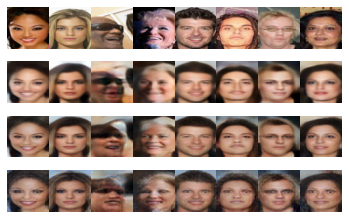

In [19]:
%matplotlib inline
import argparse
import matplotlib.pyplot as plt
import matplotlib
import os
import torch
import torchvision.transforms as transforms

from PIL import Image
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from utils.hyperparameters import DIM_LATENT, NORMALIZE_MEAN, NORMALIZE_STDEV
from utils.img_transforms import transform, transform_back
from utils.plots import grid_add_img
from models.vae import VAE

img_names = os.listdir('/content/DFC-VAE/data/celeba/img_align_celeba/')
n_imgs = 8

args = ["/content/DFC-VAE/trained_models/pvae.pt"
,"/content/DFC-VAE/trained_models/vae1239.tmp.pt"
,"/content/DFC-VAE/trained_models/vae345.pt"]
rows = len(args) + 1

fig = plt.figure()

with torch.no_grad():
    for k in range(3):
        vae = VAE(DIM_LATENT)
        vae.load_state_dict(torch.load(args[k]))
        for i in range(n_imgs):
            path = os.path.join('/content/DFC-VAE/data/celeba/img_align_celeba/', img_names[i])
            img = Image.open(path)
                
            x_true = transform(img)
            x_true = x_true.unsqueeze(0)
            x_true = x_true.view(1, 3, 64, 64)
            x_rec, mu, logvar = vae(x_true)

            x_true = x_true.squeeze(0)
            x_rec = x_rec.squeeze(0)

            img_true = transform_back(x_true)
            img_rec = transform_back(x_rec)

            if k == 0: grid_add_img(img_true, fig, rows, n_imgs, i+1)
            grid_add_img(img_rec, fig, rows, n_imgs, (k+1)*n_imgs+i+1)
fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

##  Visualize Linear Interpolation of Latent Space
You may choose to select any two images and visualise the smooth transitioning showcasing feature perceptual loss (in the case of VAE123 and VAE345) and a bit abrupt interpolation owing to pixel based loss in the case of PVAE. 


KL Loss 260.8085632324219


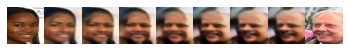

In [15]:
%matplotlib inline
import argparse
import matplotlib.pyplot as plt
import numpy as np
import torch

from models.vae import VAE
from PIL import Image
from utils.hyperparameters import DIM_LATENT, RESIZE_HEIGHT, RESIZE_WIDTH,\
    NORMALIZE_MEAN, NORMALIZE_STDEV
from utils.loss_functions import kl_loss, l2_loss, vgg123_loss, vgg345_loss
from utils.interpolation import linear_interpolation
from utils.img_transforms import transform, transform_back
from utils.plots import grid_add_img

args = ["/content/DFC-VAE/trained_models/pvae.pt",
        "/content/DFC-VAE/data/celeba/img_align_celeba/000256.jpg",
        "/content/DFC-VAE/data/celeba/img_align_celeba/000295.jpg"]
vae = VAE(DIM_LATENT)
vae.load_state_dict(torch.load(args[0]))

# load images and sample latent state
img_left = Image.open(args[1])
x_left = transform(img_left)
x_left = x_left.unsqueeze(0)
x_left = x_left.view(1, 3, 64, 64)
img_right = Image.open(args[2])
x_right = transform(img_right)
x_right = x_right.unsqueeze(0)
x_right = x_right.view(1, 3, 64, 64)

with torch.no_grad():
        mu_left, logvar_left = vae.encode(x_left)
        stdev_left = torch.exp(logvar_left/2.0)
        latent_left = vae.sample(mu_left, stdev_left)

        mu_right, logvar_right = vae.encode(x_right)
        stdev_right = torch.exp(logvar_right/2.0)
        latent_right = vae.sample(mu_right, stdev_right)

        interpolation = linear_interpolation(latent_left, latent_right)

        alphas = np.arange(0, 1.4, 0.2)
        n_alphas = len(alphas)
        
        fig = plt.figure()

        grid_add_img(transform_back(x_left.squeeze(0)), fig, 1, n_alphas+2, 1)

        for i in range(n_alphas):
            alpha = alphas[i]
            latent = interpolation(alpha)
            x_rec = vae.decode(latent)
            x_rec = x_rec.squeeze(0)
            img_rec = transform_back(x_rec)

            grid_add_img(img_rec, fig, 1, n_alphas+2, i+1+1)
        
        grid_add_img(transform_back(x_right.squeeze(0)), fig, 1, n_alphas+2, n_alphas+2)

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [49]:
cd /content/DFC-VAE

/content/Deep-Feature-Consistent-VAE


## Visualize Facial Attribute Manipulation
From the list of 40 attributes you may choose to apply any filter and contrast the results for the three VAE variants. As described in the README, you may also choose to remove a particular facial attribute by following the steps mentioned 

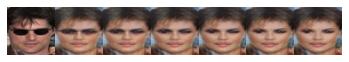

In [48]:
%matplotlib inline
import argparse
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
import torch

from utils.loss_functions import kl_loss, l2_loss, vgg123_loss, vgg345_loss
from PIL import Image
from models.vae import VAE
from utils.hyperparameters import DIM_LATENT
from utils.plots import grid_add_img
from utils.img_transforms import transform, transform_back


attributes = ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',\
    'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair',\
    'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby',\
    'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup',\
    'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes',\
    'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',\
    'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',\
    'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',\
    'Wearing_Necktie', 'Young']


def mean_latent(vae, file_names,imgdir):
    latent_res = torch.zeros(DIM_LATENT)
    n = len(file_names)

    with torch.no_grad():
        for file_name in file_names:
            path = os.path.join(imgdir, file_name)
            img = Image.open(path)
            x = transform(img)
            x = x.unsqueeze(0)
            mean, logvar = vae.encode(x)
            latent = vae.sample(mean, torch.exp(logvar/2.0))
            latent = latent.squeeze(0)

            latent_res += latent
    
    latent_res /= n

    return latent_res


args = ['/content/DFC-VAE/trained_models/vae345.pt',
            '/content/DFC-VAE/data/celeba/Ann/list_attr_celeba.csv',
            'Eyeglasses','/content/DFC-VAE/data/celeba/img_align_celeba']

vae = VAE(DIM_LATENT)
vae.load_state_dict(torch.load(args[0]))

files_pos = []
files_neg = []

csvfile = open(args[1], 'r')
reader = csv.DictReader(csvfile)

for row in reader:
        if row[args[2]] == '1':
            files_pos.append(row['image_id'])
        elif row[args[2]] == '-1':
            files_neg.append(row['image_id'])
        else: raise ValueError("found non-matching label")
    
files_pos = np.random.choice(files_pos, 1000, replace=False)
files_neg = np.random.choice(files_neg, 1000, replace=False)

latent_pos = mean_latent(vae, files_pos, args[3])
latent_neg = mean_latent(vae, files_neg, args[3])
latent_attr = latent_pos - latent_neg

img = Image.open('/content/DFC-VAE/data/celeba/img_align_celeba/000053.jpg')
x_true = transform(img)
x_true = x_true.unsqueeze(0)
mean, logvar = vae.encode(x_true)
latent_img = vae.sample(mean, torch.exp(logvar/2.0))
latent_img = latent_img.squeeze(0)
#change the range of alphas depending upon the depth of the filter and unwanted noise added along with the desired attribute 
alphas = np.arange(0, 1.6, 0.3)
n_alphas = len(alphas)

fig = plt.figure()

grid_add_img(transform_back(x_true.squeeze(0)), fig, 1, n_alphas+1, 1)

for i in range(n_alphas):
        alpha = alphas[i]
#       In the current state, the latent attribute is being removed from the target image, change the sign below to '+' in order to add 
#       try a particular face filter
        latent = latent_img - alpha * latent_attr
        x_rec = vae.decode(latent)
        x_rec = x_rec.squeeze(0)
        img_rec = transform_back(x_rec)

        grid_add_img(img_rec, fig, 1, n_alphas+1, i+1+1)

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()